In [6]:
import psycopg2

connect = psycopg2.connect(
    database="my_project",
    user="postgres",
    password="2120",
    host="127.0.0.1",
    port="5432",
)
cursor = connect.cursor()


cursor.execute("SELECT COUNT(*) FROM passport")
num_passports = cursor.fetchone()[0]

cursor.execute("SELECT COUNT(*) FROM users")
num_users = cursor.fetchone()[0]

cursor.execute("SELECT COUNT(*) FROM bank")
num_banks = cursor.fetchone()[0]

cursor.execute("SELECT COUNT(*) FROM account_type")
num_account_types = cursor.fetchone()[0]

cursor.execute("SELECT COUNT(*) FROM account")
num_accounts = cursor.fetchone()[0]

cursor.execute("SELECT COUNT(*) FROM registry")
num_registries = cursor.fetchone()[0]

print("Статистика базы данных:")
print(f"Количество паспортов: {num_passports}")
print(f"Количество пользователей: {num_users}")
print(f"Количество банков: {num_banks}")
print(f"Количество типов счетов: {num_account_types}")
print(f"Количество счетов: {num_accounts}")
print(f"Количество записей в реестре: {num_registries}")

Статистика базы данных:
Количество паспортов: 1010
Количество пользователей: 1010
Количество банков: 25
Количество типов счетов: 230
Количество счетов: 1090
Количество записей в реестре: 1090


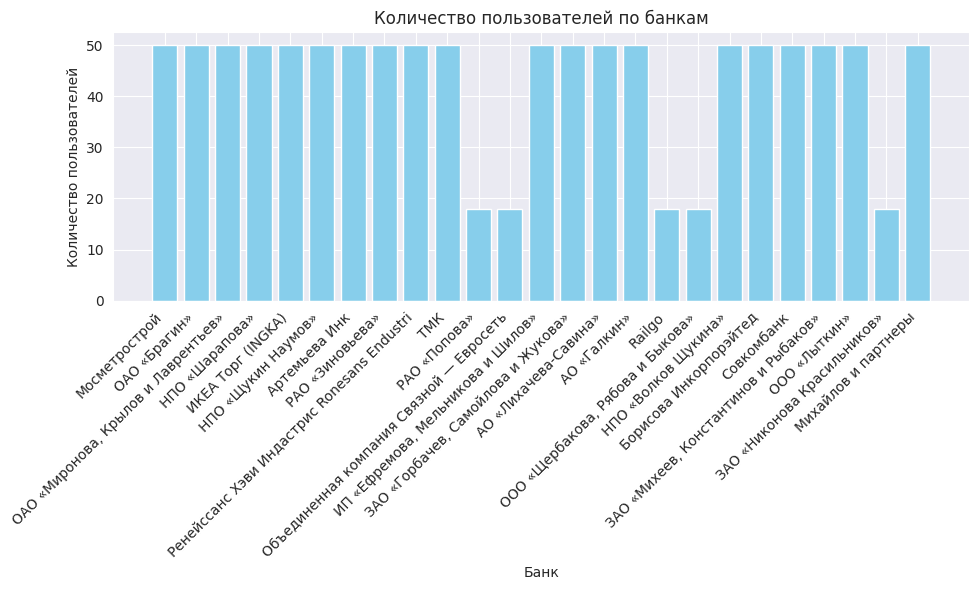

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

cursor.execute("""
    SELECT b.bank_nm, COUNT(u.user_id) AS user_count
    FROM bank b
    LEFT JOIN account_type at ON b.bank_id = at.bank_id
    LEFT JOIN account a ON at.acc_type_id = a.acc_type_id
    LEFT JOIN registry r ON a.account_id = r.account_id
    LEFT JOIN users u ON r.user_id = u.user_id
    GROUP BY b.bank_nm
""")
data = cursor.fetchall()

banks = [row[0] for row in data]
user_counts = [row[1] for row in data]

plt.figure(figsize=(10, 6))
plt.bar(banks, user_counts, color='skyblue')
plt.title('Количество пользователей по банкам')
plt.xlabel('Банк')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


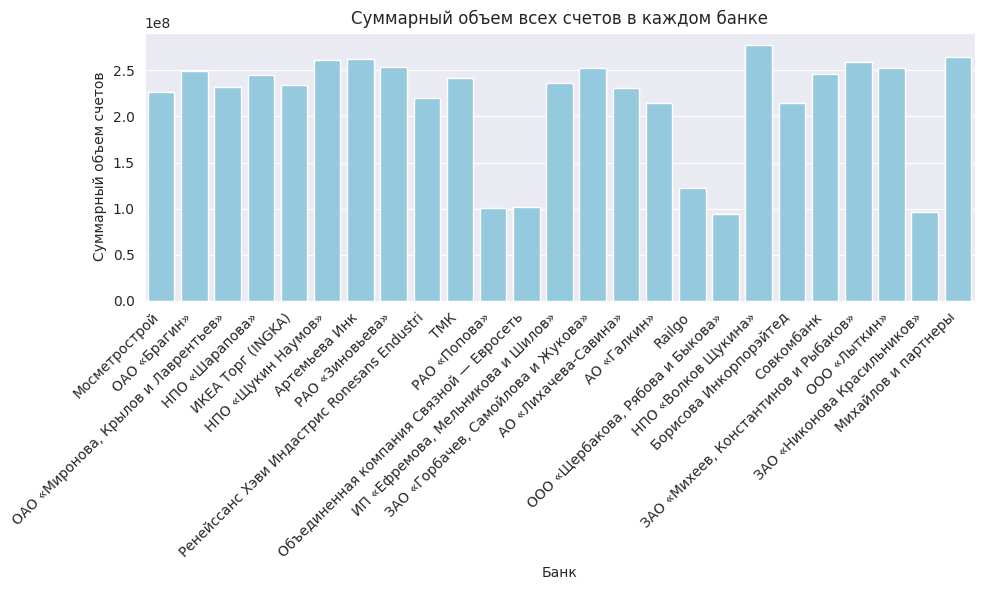

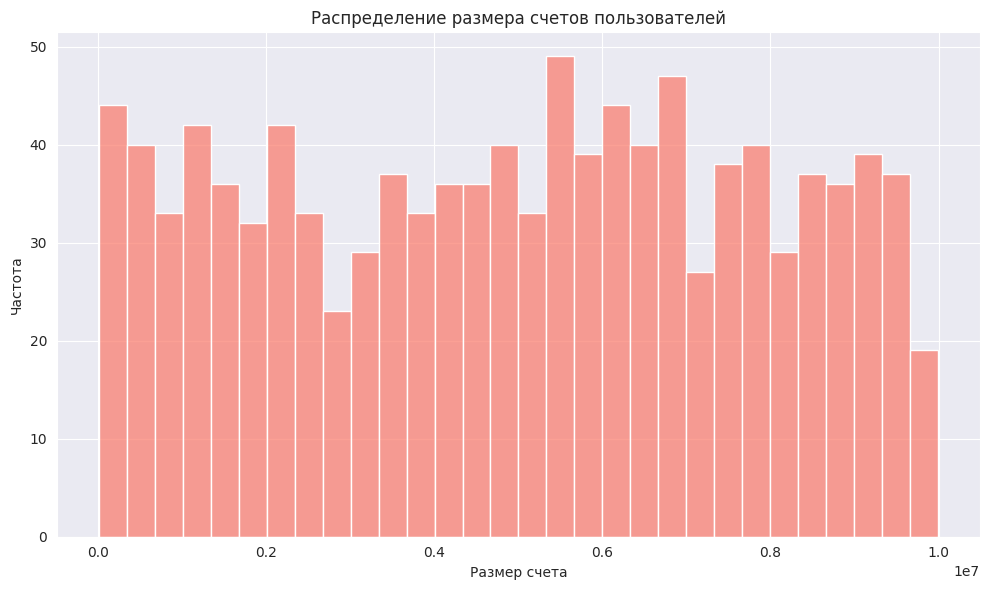

In [9]:
cursor.execute("""
    SELECT b.bank_nm, SUM(a.cur_balance_amt) AS total_balance
    FROM bank b
    LEFT JOIN account_type at ON b.bank_id = at.bank_id
    LEFT JOIN account a ON at.acc_type_id = a.acc_type_id
    GROUP BY b.bank_nm
""")
balance_data = cursor.fetchall()

cursor.execute("""
    SELECT a.cur_balance_amt
    FROM account a
    JOIN registry r ON a.account_id = r.account_id
""")
user_balance_data = cursor.fetchall()

plt.figure(figsize=(10, 6))
sns.barplot(x=[row[0] for row in balance_data], y=[row[1] for row in balance_data], color='skyblue')
plt.title('Суммарный объем всех счетов в каждом банке')
plt.xlabel('Банк')
plt.ylabel('Суммарный объем счетов')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot([row[0] for row in user_balance_data], bins=30, color='salmon')
plt.title('Распределение размера счетов пользователей')
plt.xlabel('Размер счета')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()


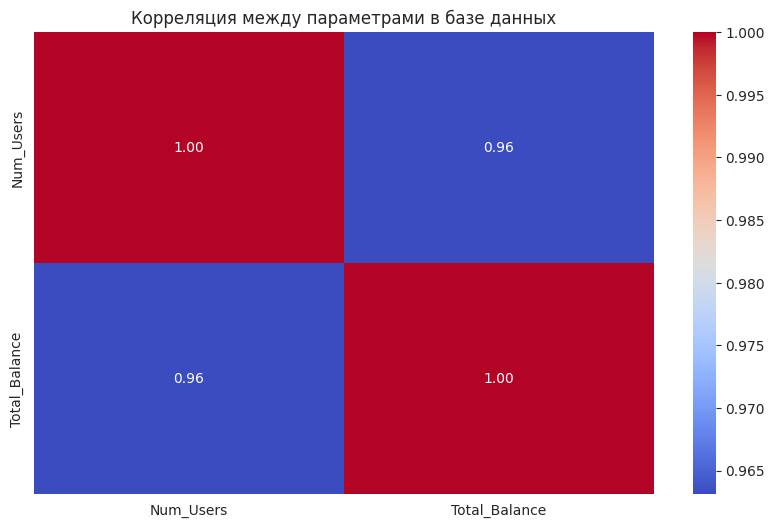

In [11]:
cursor.execute("""
    SELECT COUNT(u.user_id) AS num_users, SUM(a.cur_balance_amt) AS total_balance
    FROM bank b
    LEFT JOIN account_type at ON b.bank_id = at.bank_id
    LEFT JOIN account a ON at.acc_type_id = a.acc_type_id
    LEFT JOIN registry r ON a.account_id = r.account_id
    LEFT JOIN users u ON r.user_id = u.user_id
    GROUP BY b.bank_nm
""")
heatmap_data = cursor.fetchall()

import pandas as pd
df = pd.DataFrame(heatmap_data, columns=['Num_Users', 'Total_Balance'])

plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Корреляция между параметрами в базе данных')
plt.show()

In [12]:
cursor.close()
connect.close()